<a href="https://colab.research.google.com/github/Khuks/Stock-Price-Prediction-Using-Time-Series-Models-/blob/main/MAT499_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1></h1>

<h1>Stock Price Prediction Using statistical and Deep  learning models</h1>

In [ ]:
!pip install pmdarima
#!pip uninstall statsmodels
#!pip install statsmodels --upgrade

     |████████████████████████████████| 1.5MB 9.0MB/s 
     |████████████████████████████████| 2.1MB 39.5MB/s 
     |████████████████████████████████| 9.5MB 41.4MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:

import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from pmdarima.arima import auto_arima
#!pip uninstall statsmodels
#!pip install statsmodels --pgrade

In [ ]:
## Get the FirstRand stock data
start = datetime.datetime(2010, 6, 22)
end = datetime.datetime(2020, 6, 22)
df = web.DataReader("FSR.JO", 'yahoo', start, end)##The stock price had been sourced from yahoo finance 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-22,1557.414551,1514.822754,1516.430054,1557.414551,17448328.0,974.237061
2010-06-23,1550.985596,1515.626343,1539.734863,1526.876953,6567573.0,955.134460
2010-06-24,1540.538452,1513.215454,1538.931274,1526.876953,7125737.0,955.134460
2010-06-25,1550.985596,1514.822754,1515.626343,1515.626343,8370315.0,948.096619
2010-06-28,1550.182007,1498.750244,1516.430054,1526.876953,7139847.0,955.134460
...,...,...,...,...,...,...
2020-06-15,4309.000000,4179.000000,4234.000000,4225.000000,14152751.0,4225.000000
2020-06-17,4396.000000,4270.000000,4320.000000,4288.000000,23064403.0,4288.000000
2020-06-18,4281.000000,4082.000000,4250.000000,4121.000000,38491712.0,4121.000000


In [ ]:
print(df.head())
print(df.shape)

                   High          Low  ...      Volume   Adj Close
Date                                  ...                        
2010-06-22  1557.414551  1514.822754  ...  17448328.0  974.237061
2010-06-23  1550.985596  1515.626343  ...   6567573.0  955.134460
2010-06-24  1540.538452  1513.215454  ...   7125737.0  955.134460
2010-06-25  1550.985596  1514.822754  ...   8370315.0  948.096619
2010-06-28  1550.182007  1498.750244  ...   7139847.0  955.134460

[5 rows x 6 columns]
(2577, 6)


In [ ]:
df_10 = pd.DataFrame()
df_10['Adj Close'] = df['Adj Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Adj Close'] = df['Adj Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Adj Close'] = df['Adj Close'].rolling(window=40).mean()


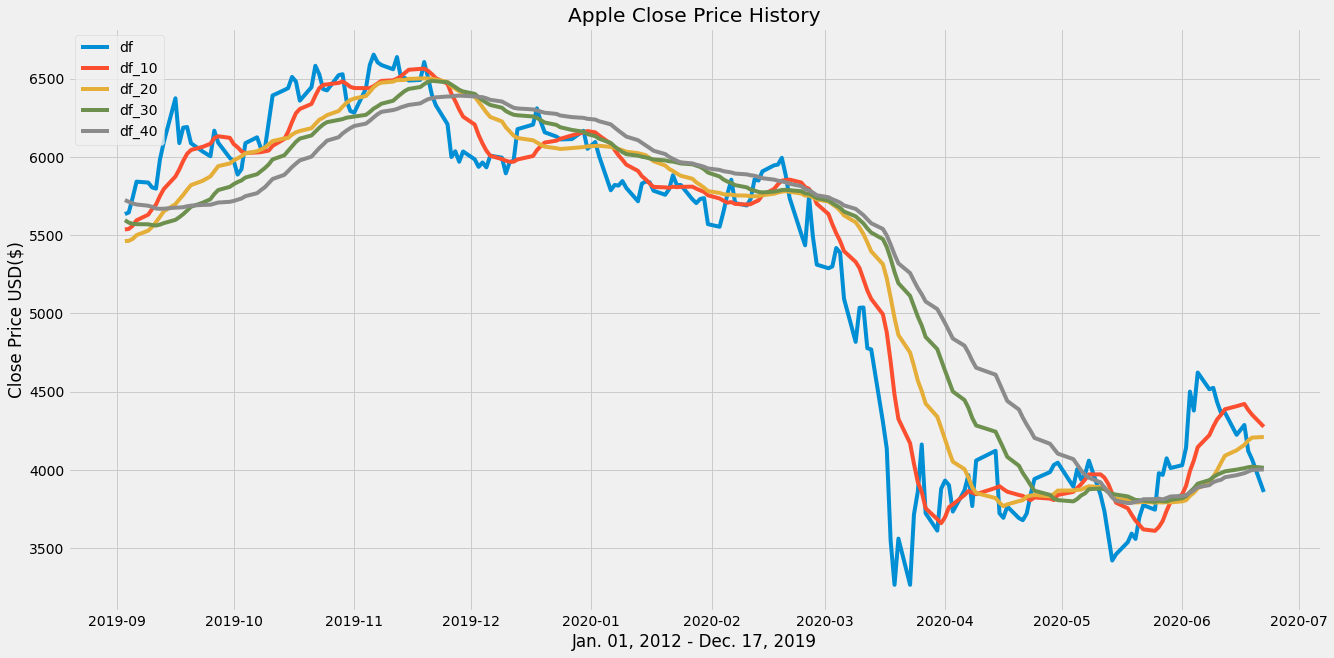

In [ ]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Adj Close'].tail(200), label='df')
plt.plot(df_10['Adj Close'].tail(200), label='df_10')
plt.plot(df_20['Adj Close'].tail(200), label='df_20')
plt.plot(df_30['Adj Close'].tail(200), label='df_30')
plt.plot(df_40['Adj Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Adj Close'])
data.head()

,Adj Close
Date,
2010-06-22,974.237061
2010-06-23,955.134460
2010-06-24,955.134460
2010-06-25,948.096619
2010-06-28,955.134460


In [ ]:
#Convert the dataframe to a numpy array
dataset = data.values

In [ ]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2062

In [ ]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.01141827],
        [0.00813121],
        [0.00813121],
        ...,
        [0.55289316],
        [0.54360119],
        [0.50798195]]), (2577, 1))

In [ ]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.01141827, 0.00813121, 0.00813121, 0.00692019, 0.00813121,
       0.00553613, 0.        , 0.00095155, 0.0047576 , 0.00467115,
       0.00882325, 0.01072625, 0.01375379, 0.01427283, 0.01332132,
       0.01721386, 0.01539733, 0.01280227, 0.01505133, 0.01332132,
       0.01427283, 0.0180789 , 0.02127948, 0.02214449, 0.02370151,
       0.02024145, 0.01980897, 0.02024145, 0.01894396, 0.02197145,
       0.01608941, 0.0132348 , 0.01262928, 0.01193727, 0.01169682,
       0.00856373, 0.0042386 , 0.00570916, 0.00519011, 0.00605517,
       0.00856373, 0.00467115, 0.00510365, 0.00337357, 0.0084772 ,
       0.0068337 , 0.00449814, 0.00596868, 0.00441166, 0.0068337 ,
       0.01098575, 0.01799241, 0.01513787, 0.01634889, 0.0161759 ,
       0.01245626, 0.01470537, 0.01643539, 0.01842493, 0.02153902])]
[0.018251892276829884]

[array([0.01141827, 0.00813121, 0.00813121, 0.00692019, 0.00813121,
       0.00553613, 0.        , 0.00095155, 0.0047576 , 0.00467115,
       0.00882325, 0.01072625, 0.0

In [ ]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2002, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2002/2002 [==============================] - 13s 5ms/step - loss: 0.0039
Epoch 2/10
2002/2002 [==============================] - 11s 6ms/step - loss: 5.5679e-04
Epoch 3/10
2002/2002 [==============================] - 11s 6ms/step - loss: 4.8584e-04
Epoch 4/10
2002/2002 [==============================] - 11s 5ms/step - loss: 4.0740e-04
Epoch 5/10
2002/2002 [==============================] - 10s 5ms/step - loss: 2.9939e-04
Epoch 6/10
2002/2002 [==============================] - 11s 5ms/step - loss: 2.3920e-04
Epoch 7/10
2002/2002 [==============================] - 11s 6ms/step - loss: 2.6592e-04
Epoch 8/10
2002/2002 [==============================] - 11s 5ms/step - loss: 2.2313e-04
Epoch 9/10
2002/2002 [==============================] - 11s 5ms/step - loss: 2.6063e-04
Epoch 10/10
2002/2002 [==============================] - 11s 5ms/step - loss: 1.9581e-04


In [ ]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
print(predictions[0:5], y_test[0:5])

[[5414.1104]
 [5411.3135]
 [5537.9717]
 [5713.381 ]
 [5476.7896]] [[5401.18603516]
 [5513.71044922]
 [5702.75244141]
 [5545.21826172]
 [5529.91455078]]


In [ ]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mape = np.mean(np.abs(predictions - y_test) / y_test) * 100
#mae = np.mean(np.abs(predictions - y_test))
mse, rmse ,mape

(283.537549790411, 16.838573270631066, 1.893027942003988)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


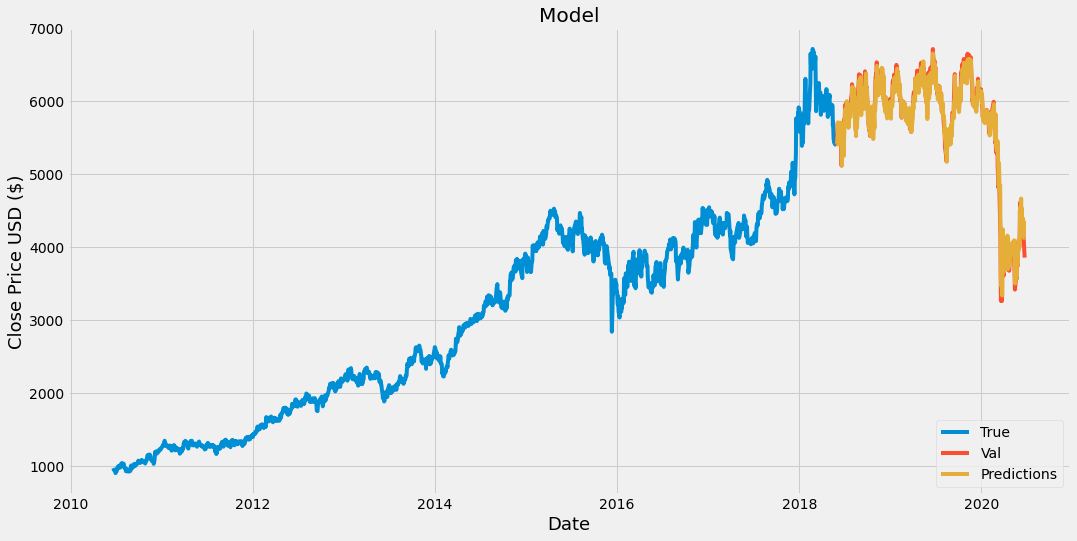

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# Get the quote
apple_quote = web.DataReader('FSR.JO', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Adj Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 day 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[6139.808]]


In [ ]:
# Get the quote
apple_quote2 = web.DataReader('FSR.JO', data_source='yahoo', start='2019-12-18', end='2019-12-18')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,6553,6418,6441,6548,9364622,6310.600098


# **APPLE price prediction using facebook Prophet**

## Load EDA libraries


In [ ]:
##  https://www.youtube.com/watch?v=AX1wKnBPhvU
## https://www.viralml.com/video-content.html?v=AX1wKnBPhvU

## https://www.youtube.com/watch?v=95-HMzxsghY&t=689s
## https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
## Load the data
df = web.DataReader('FSR.JO',data_source='yahoo', start='2010-06-22', end='2020-06-22')

In [ ]:
## Get the number of rows and columns
df = df.reset_index()

In [ ]:
df.shape, df.tail(), df.columns

((2577, 7),
            Date    High     Low    Open   Close      Volume  Adj Close
 2572 2020-06-15  4309.0  4179.0  4234.0  4225.0  14152751.0     4225.0
 2573 2020-06-17  4396.0  4270.0  4320.0  4288.0  23064403.0     4288.0
 2574 2020-06-18  4281.0  4082.0  4250.0  4121.0  38491712.0     4121.0
 2575 2020-06-19  4249.0  4067.0  4140.0  4067.0  38134559.0     4067.0
 2576 2020-06-22  4067.0  3803.0  4067.0  3860.0  32373216.0     3860.0,
 Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'))

In [ ]:
df = df.filter(['Date','Adj Close'])
df.head()

,Date,Adj Close
0,2010-06-22,974.237061
1,2010-06-23,955.134460
2,2010-06-24,955.134460
3,2010-06-25,948.096619
4,2010-06-28,955.134460


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2577 non-null   datetime64[ns]
 1   Adj Close  2577 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.4 KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Adj Close
0,2010-06-22,974.237061
1,2010-06-23,955.134460
2,2010-06-24,955.134460
3,2010-06-25,948.096619
4,2010-06-28,955.134460


In [ ]:
# To filter negative values
df.index[df['Adj Close'] < 0]

Int64Index([], dtype='int64')

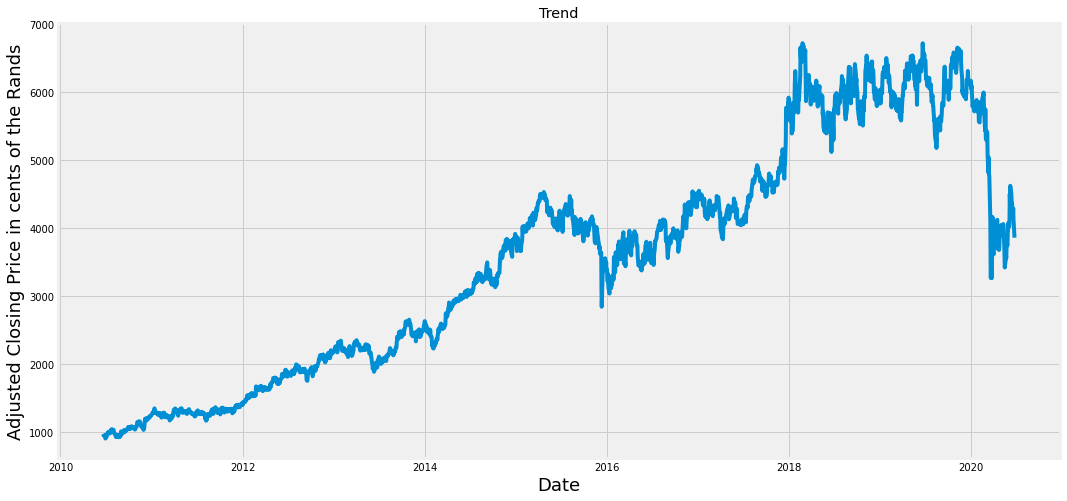

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Closing Price in cents of the Rands', fontsize=18)
plt.show()

In [ ]:
# yt = yt-y(t-1) 
df['Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
y = df['Close_shift']

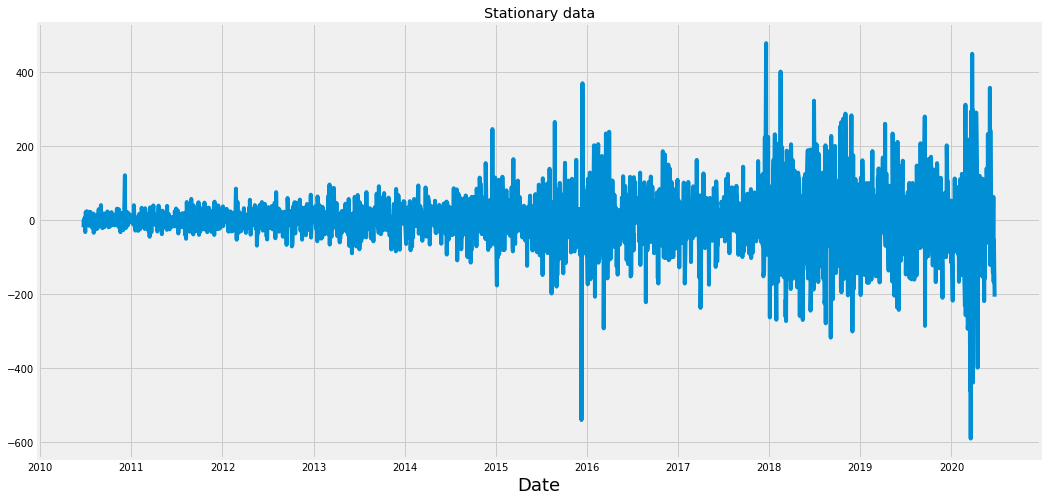

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

Now, the above graph looks stationary

In [ ]:
from fbprophet import Prophet

## Initialize the model

In [ ]:
model = Prophet()

**Paremeters**


*   growth: linear/logistic
*   seasonality:additive/multiplicative
*   holidays:
*   changepoint







In [ ]:
df.columns

Index(['Date', 'Adj Close', 'Close_shift'], dtype='object')

In [ ]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'Date':'ds', 'Close_shift':'y'})#, inplace=True)

In [ ]:
df_pht.head()

,ds,Adj Close,y
0,2010-06-22,974.237061,NaN
1,2010-06-23,955.134460,-19.102600
2,2010-06-24,955.134460,0.000000
3,2010-06-25,948.096619,-7.037842
4,2010-06-28,955.134460,7.037842


In [ ]:
## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

2061

In [ ]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds   Adj Close          y
 0 2010-06-22  974.237061        NaN
 1 2010-06-23  955.134460 -19.102600
 2 2010-06-24  955.134460   0.000000
 3 2010-06-25  948.096619  -7.037842
 4 2010-06-28  955.134460   7.037842, (2061, 3))

## Fit our Model to our Data

In [ ]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
periods = len(df)-len(df_train)
periods

516

In [ ]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [ ]:
# Shape after adding 401 days
future_dates.shape

(2577, 1)

In [ ]:
future_dates.head()

,ds
0,2010-06-22
1,2010-06-23
2,2010-06-24
3,2010-06-25
4,2010-06-28


In [ ]:
# Make Prediction 
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-22,-2.079810,-70.248040,79.882990,-2.079810,-2.079810,6.640253,6.640253,6.640253,8.181517,8.181517,8.181517,-1.541263,-1.541263,-1.541263,0.0,0.0,0.0,4.560443
1,2010-06-23,-2.079246,-72.128261,75.903174,-2.079246,-2.079246,-1.373841,-1.373841,-1.373841,-0.177267,-0.177267,-0.177267,-1.196574,-1.196574,-1.196574,0.0,0.0,0.0,-3.453086
2,2010-06-24,-2.078681,-72.179611,79.457995,-2.078681,-2.078681,4.917546,4.917546,4.917546,5.758077,5.758077,5.758077,-0.840532,-0.840532,-0.840532,0.0,0.0,0.0,2.838865
3,2010-06-25,-2.078116,-78.025290,67.769647,-2.078116,-2.078116,-4.225085,-4.225085,-4.225085,-3.751660,-3.751660,-3.751660,-0.473424,-0.473424,-0.473424,0.0,0.0,0.0,-6.303201
4,2010-06-28,-2.076421,-71.003761,81.052651,-2.076421,-2.076421,7.702697,7.702697,7.702697,7.010612,7.010612,7.010612,0.692085,0.692085,0.692085,0.0,0.0,0.0,5.626276


**Narrative**


*   yhat : the predicted forecast
*   yhat_lower : the lower border of the prediction

*   yhat_upper: the upper border of the prediction





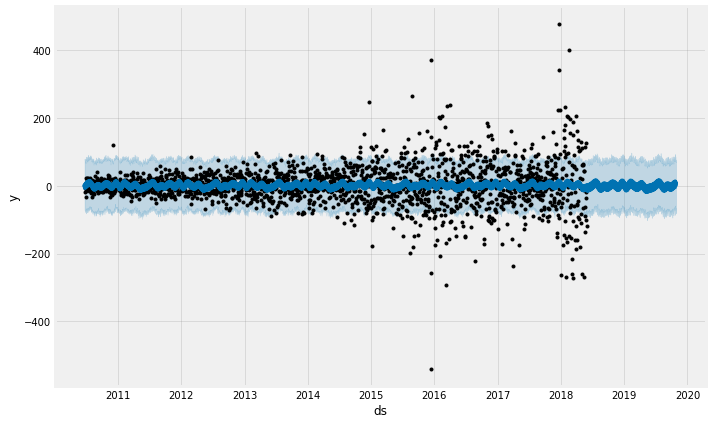

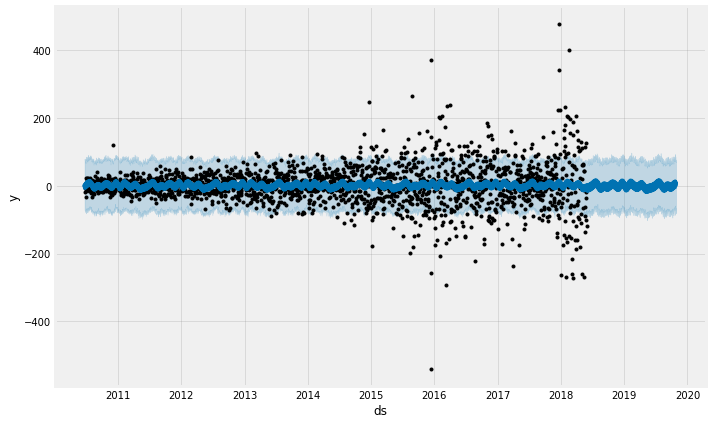

In [ ]:
# Plot Our Predictions
model.plot(prediction)

**Narrative**

*   A Trending data
*   Black dots : the actual data points in our dataset.

*   Deep blue line : the predicted forecast/the predicted values
*   Light blue line : the boundaries





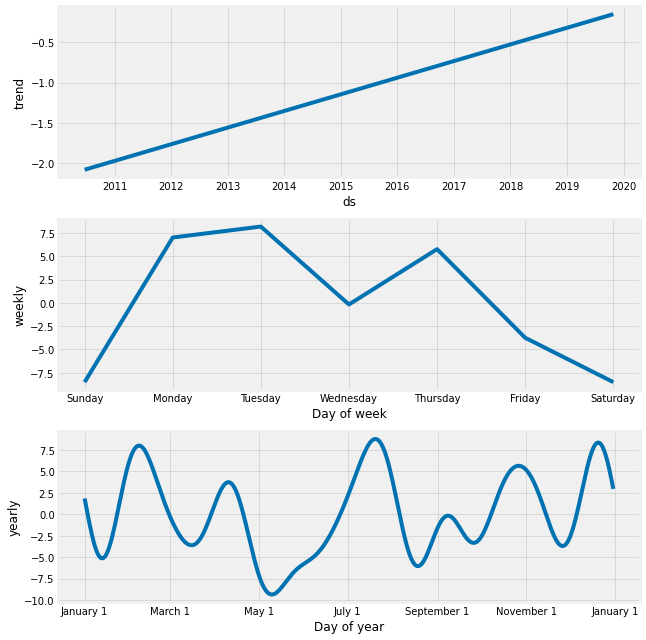

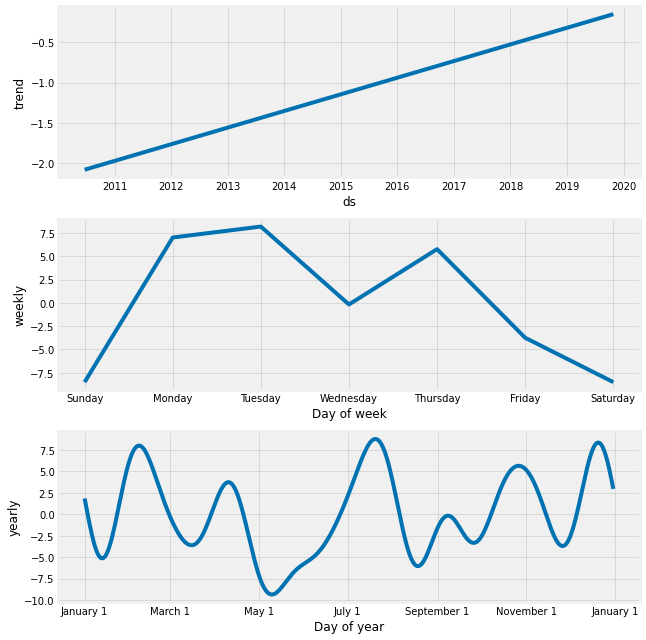

In [ ]:
model.plot_components(prediction)

**Cross Validation**

*   For measuring forecast error by comparing the predicted values with the actual values

*   initial:the size of the initial training period

*   period : the spacing between cutoff dates
*   horizon : the forecast horizon((ds minus cutoff)


*   By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon



In [ ]:
# import cross_validation
from fbprophet.diagnostics import cross_validation

In [ ]:
df_train.shape, len(df)-len(df_train)

((2061, 3), 516)

In [ ]:
cv = cross_validation(model, initial='1704 days', period='1 days', horizon = '427 days')

INFO:fbprophet:Making 767 forecasts with cutoffs between 2015-02-21 00:00:00 and 2017-03-28 00:00:00


In [ ]:
cv.head(), cv.shape

(          ds       yhat  yhat_lower  yhat_upper          y     cutoff
 0 2015-02-23   5.431852  -35.818041   51.041332  23.031006 2015-02-21
 1 2015-02-24  10.651756  -31.140124   50.217423  53.740967 2015-02-21
 2 2015-02-25   1.137893  -40.650630   39.589101  24.567871 2015-02-21
 3 2015-02-26   6.002272  -36.433355   44.017520  52.205566 2015-02-21
 4 2015-02-27   1.975691  -36.023754   41.110984 -42.225098 2015-02-21,
 (231891, 6))

**Performance Metrics**

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:

df_train_pm = performance_metrics(cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_train_pm

,horizon,mse,rmse,mae,mdape,coverage
0,43 days,6155.182287,78.454970,56.132215,1.014665,0.595215
1,44 days,6157.009388,78.466613,56.140822,1.014722,0.595220
2,45 days,6157.564131,78.470148,56.144917,1.014665,0.595480
3,46 days,6157.216759,78.467935,56.144713,1.014665,0.595636
4,47 days,6157.351512,78.468793,56.146708,1.014650,0.596047
...,...,...,...,...,...,...
380,423 days,7084.177585,84.167557,60.714172,1.014798,0.567640
381,424 days,7085.497707,84.175398,60.730811,1.014859,0.567033
382,425 days,7090.216911,84.203426,60.755723,1.014895,0.566592
383,426 days,7095.894441,84.237132,60.785456,1.014854,0.566253


## MSE & RMSE

In [ ]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MDAPE =sum(df_train_pm['mdape'])/len(df_train_pm)
MSE, RMSE ,MDAPE

(6349.902480984149, 79.65148541895744, 1.018097821660716)

**Visualizing Performance Metrics**

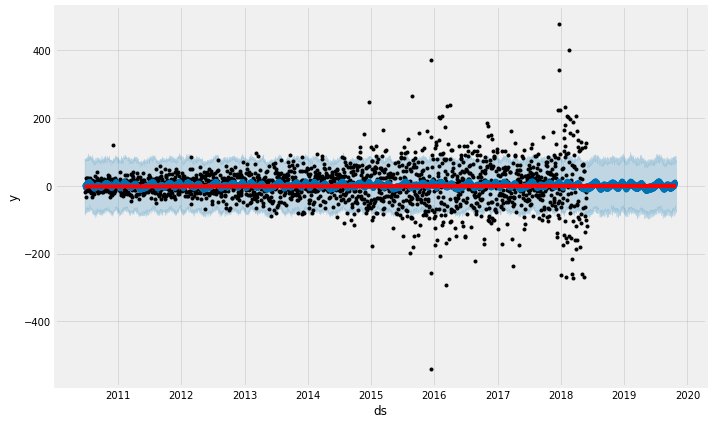

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

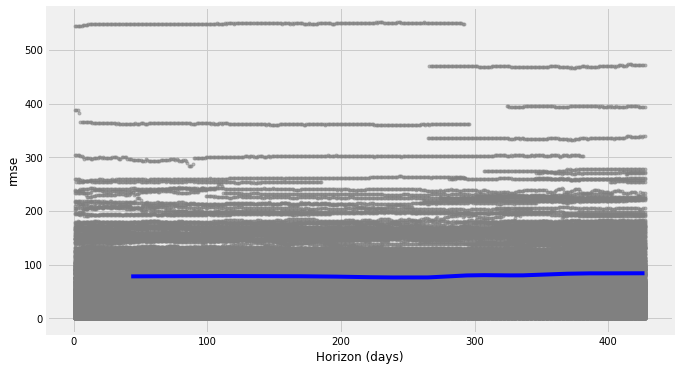

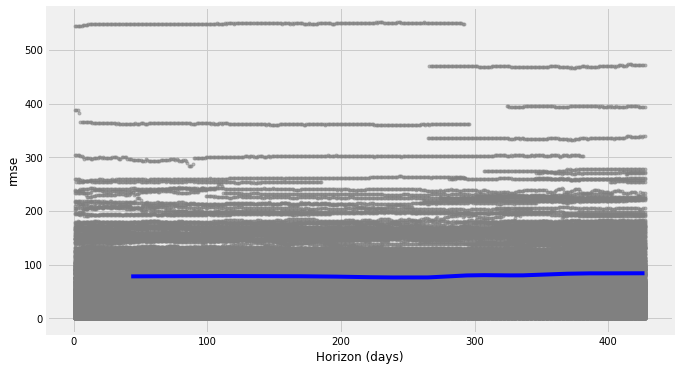

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

# **APPLE price prediction using ARIMA Model**

In this notebook will be performed:
1. Importing Libraries
2. Preprocessing
3. APPLE Stock Market Analyis
4. APPLE ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction

## Importing Libraries

In [ ]:
## https://www.youtube.com/watch?v=2XGSIlgUBDI
## https://www.youtube.com/watch?v=YzMV--KhI2I

In [ ]:
#!pip uninstall sklearn
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=d709fa4f3fac5d063273b3b69b0b4da51e06ebeb88574f600666255b956d8d03
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [ ]:
import numpy as np 
import pandas as pd 
import os
import pandas_datareader as web
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import  mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import datetime
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



## Apple Stock Market Analyis

In [ ]:
df = web.DataReader('FSR.JO',data_source='yahoo', start='2010-06-22', end='2020-06-22')
#df['new_column'] = range(0, len(df))
df= df.reset_index()
#df = df.set_index('new_column')
#df = df.reset_index(drop=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-22,1557.414551,1514.822754,1516.430054,1557.414551,17448328.0,974.237061
1,2010-06-23,1550.985596,1515.626343,1539.734863,1526.876953,6567573.0,955.134460
2,2010-06-24,1540.538452,1513.215454,1538.931274,1526.876953,7125737.0,955.134460
3,2010-06-25,1550.985596,1514.822754,1515.626343,1515.626343,8370315.0,948.096619
4,2010-06-28,1550.182007,1498.750244,1516.430054,1526.876953,7139847.0,955.134460


In [ ]:
print(df.shape)
print(df.columns)

(2577, 7)
Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2577 non-null   datetime64[ns]
 1   High       2577 non-null   float64       
 2   Low        2577 non-null   float64       
 3   Open       2577 non-null   float64       
 4   Close      2577 non-null   float64       
 5   Volume     2577 non-null   float64       
 6   Adj Close  2577 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.1 KB


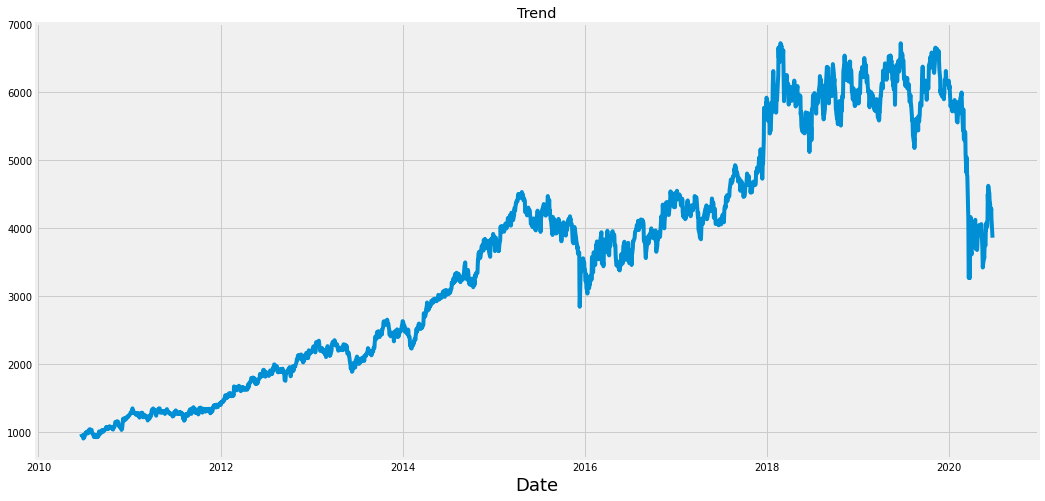

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Adj Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Adj Close'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Adj Close'])

ADF Test Statistics : -1.5357764048058866
p-value : 0.5157449169009882
#Lags Used : 27
Number of Observations Used : 2549
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [ ]:
df['Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)

In [ ]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

0       -19.102600
1       -19.102600
2         0.000000
3        -7.037842
4         7.037842
           ...    
2572   -142.000000
2573     63.000000
2574   -167.000000
2575    -54.000000
2576   -207.000000
Name: Close_shift, Length: 2577, dtype: float64

In [ ]:
test_result = adfuller(df['Close_shift'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -10.43543196987266
p-value : 1.570914337727831e-18
#Lags Used : 26
Number of Observations Used : 2550
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


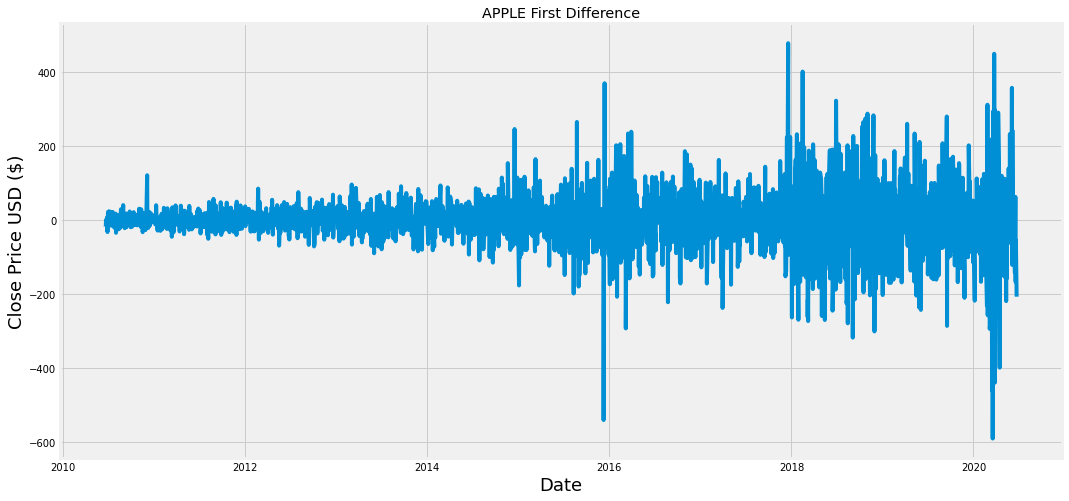

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## **Auto Regressive Model**
### **Final Thoughts on Autocorrelation and Partial Autocorrelation**

1.   Identification of an AR model is often best done with the PACF
-- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


2.   Identification of an MA model is often best done with the ACF rather than the PACF.
-- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q. AR model - p, differencing - d, MA lags - q



In [ ]:
model_autoARIMA=auto_arima(df['Close_shift'],start_p=0,start_q=0    #use adftest to find 
                          , #maximum p and q
                           m=1,            #frequency of series
                           d=None,         #let model determine 'd'  
                           seasonal=True, #No Seasonality
                           start_P=0,
                           D=0,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings='True',
                           stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29742.540, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29743.606, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=29743.530, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29741.070, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=29739.704, Time=1.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29742.997, Time=1.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29742.977, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=29741.481, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=29741.746, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29738.619, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=29742.084, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29742.158, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=29741.640, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]  

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

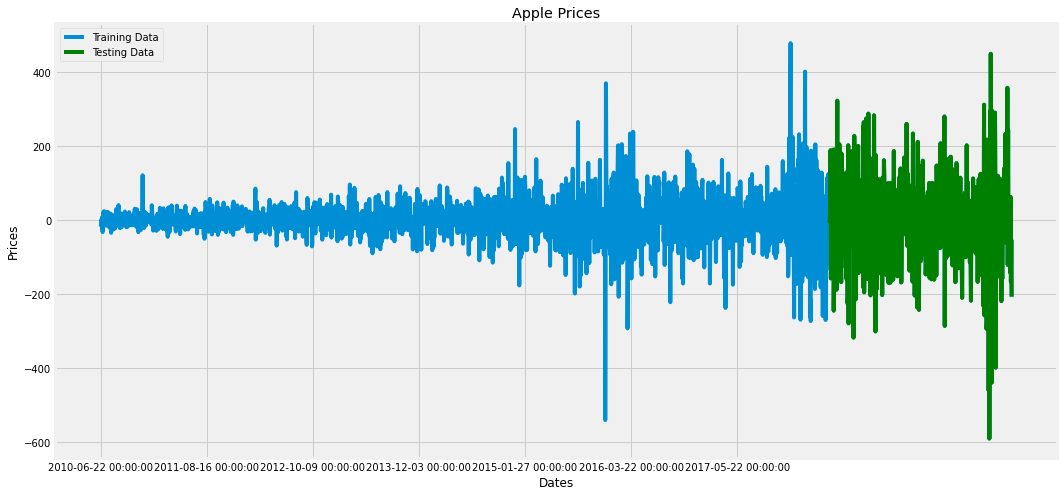

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [ ]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#model=ARIMA(train_data['Close_shift'],order=(1,1,1))
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Close_shift   No. Observations:                 2577
Model:                     ARMA(1, 1)   Log Likelihood              -14865.852
Method:                       css-mle   S.D. of innovations             77.457
Date:                Fri, 26 Feb 2021   AIC                          29739.704
Time:                        21:13:00   BIC                          29763.122
Sample:                             0   HQIC                         29748.193
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1433      1.184      0.966      0.334      -1.177       3.463
ar.L1.Close_shift     0.8999      0.078     11.576      0.000       0.748       1.052
ma.L1.Close_shift    -0.9225      0.069    -13.375      0.000      -1.058      -0.787
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1112           +0.0000j            1.1112            0.0000
MA.1            1.0840           +0.0000j            1.0840            0.0000
-----------------------------------------------------------------------------
"""

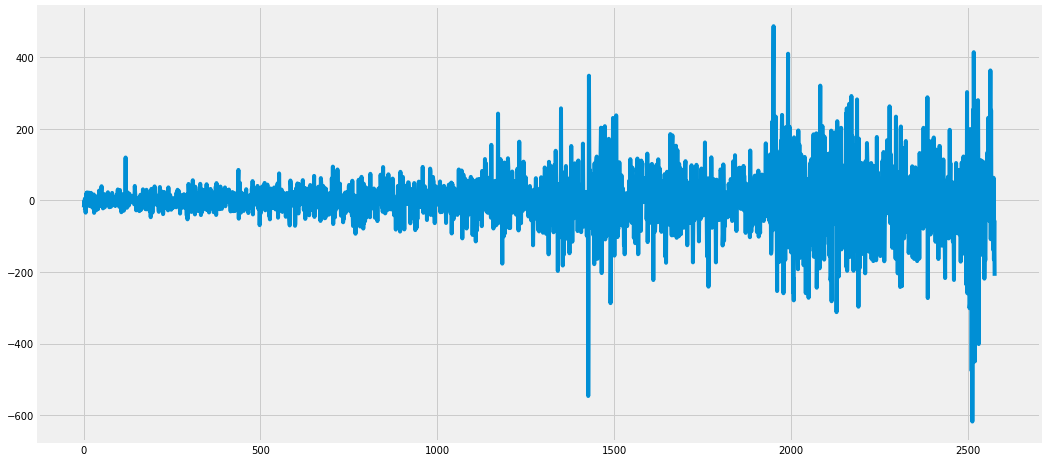

In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

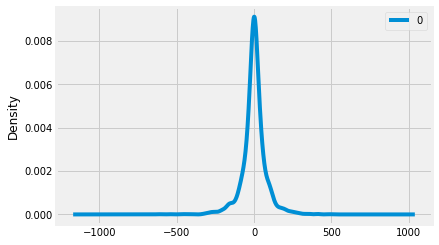

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

,0
count,2577.000000
mean,-0.003971
std,77.472120
min,-617.691170
25%,-28.276636
50%,0.343562
75%,29.891161
max,486.520469


In [ ]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [ ]:
#p_values = range(0,4)
#d_values = range(0,3)
#q_values = range(0,2)

In [ ]:
# Way-1
#import itertools
#pdq = list(itertools.product(p_values,d_values,q_values))
#pdq

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
#for param in pdq:
#  for i in range(len(test_arima)):
#        try:
#          model = ARIMA(trin_arima,order=param)
#          model_fit = model.fit(disp=0)
#          pred_y = model_fit.forecast()[0]
#          predictions.append(pred_y)
#          error = mean_sqared-error(test, predictions)
#          print(model_fit.aic)
#          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
#        except:
#          continue

In [ ]:
#for p in p_values:
#  for d in d_values:
#    for q in q_values:
#      order = (p,d,q)
#      train, test = train_arima, test_arima
#      predictions = list()
#      for i in range(len(test_arima)):
#        try:
#          model = ARIMA(train_arima,order)
#          model_fit = model.fit(disp=0)
#          pred_y = model_fit.forecast()[0]
#          predictions.append(pred_y)
#          error = mean_sqared-error(test_arima, predictions)
#          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
#        except:
#          continue


In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)
error3=mean_absolute_error(test_arima,predictions)
print('MAE : %.3f' % error3)

<class 'list'>
MSE : 16117.093
RMSE : 126.953
MAE : 96.025
inf


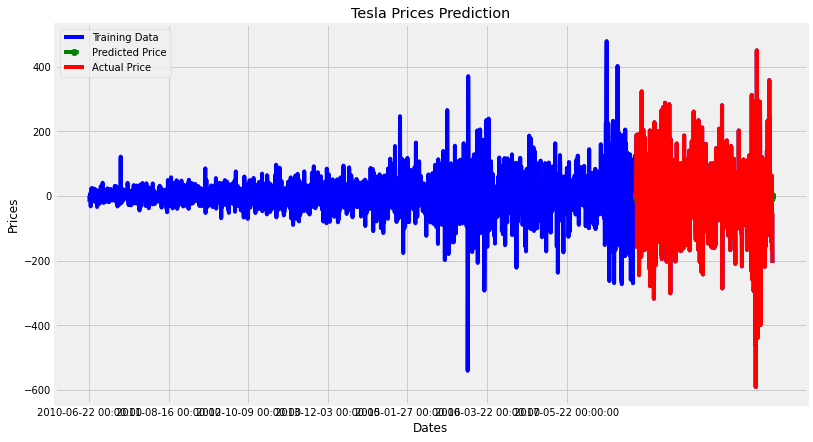

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Close_shift'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

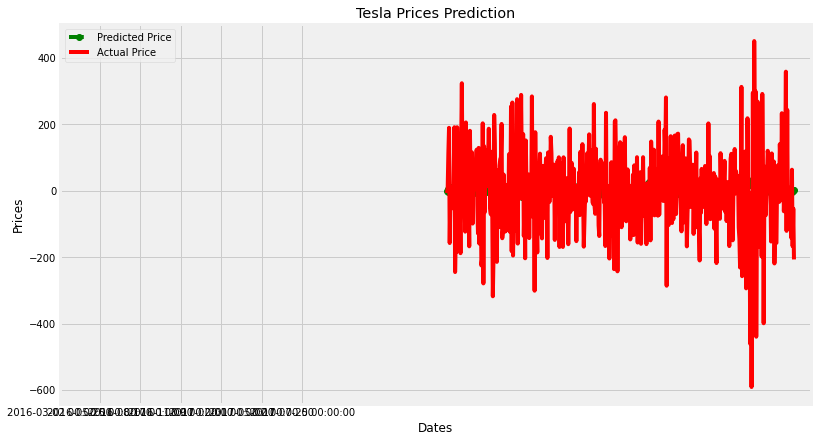

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()